# Pymaceuticals Inc.
---

### Analysis

- As part of the assignment, I was able to read the data from csv files and merge it by Mouse ID to ensure a dataframe that has the attributes from the study for each specimen and drug regimen
- The data was represented by 249 mice specimens accross 10 different drugs
- By performing exploratory analysis, I was able to identify that tumor volume fluctuated by treatment, with Ramicane and Capomulin drugs showing the smallest tumor volume and variance
- The dataset was very balanced, with 49.8% Female and 50.2% Male Mice and also fairly balanced accross drug treatments
- As part of the exploratory analysis, I studied the distribution of Tumor Volume by Treatment Group and it was very noticeable that Ramicane and Capomulin drugs had lower volume distribution when compared with the other drugs in the study
- The last part of the assigment was to perform statistical analysis of the Mouse Weight vs. Average Tumor Volume for Capomulin drug Regimen, and based on the observations, the data showed an 84% correlation and with the linear regression model I noticed that as the weight of the mice increased, the Average Tumor Volume also increased.  
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame on 'Mouse ID' column
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"Total number of unique mice: {num_mice}")

Total number of unique mice: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate entries based on 'Mouse ID' and 'Timepoint':")
print(duplicates)

Duplicate entries based on 'Mouse ID' and 'Timepoint':
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
print("\nData for duplicate Mouse ID(s):")
print(combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)])


Data for duplicate Mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fema

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data["Mouse ID"].nunique()
print(f"\nTotal number of unique mice in the clean DataFrame: {num_clean_mice}")


Total number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Display the summary statistics table
regimen_stats

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate the summary statistics table in a single line using aggregation
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
).rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Std Dev", "sem": "SEM"})

# Display the summary statistics table
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

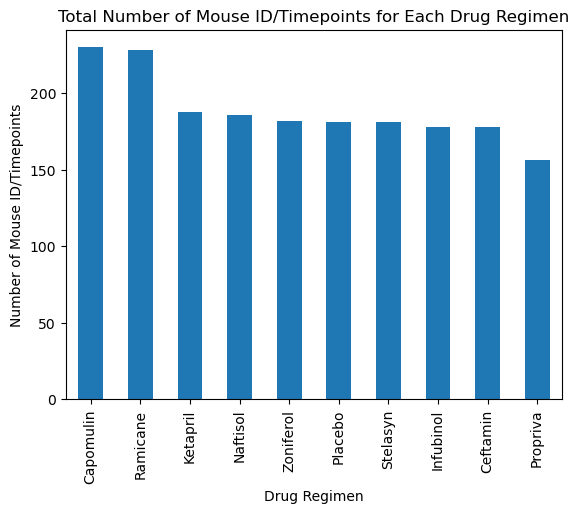

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = clean_data["Drug Regimen"].value_counts()
mouse_counts.plot(kind='bar', title="Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.show()

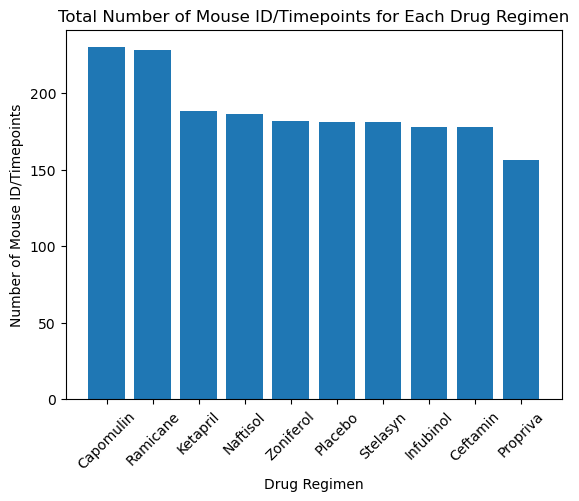

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_counts.index, mouse_counts.values)
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()

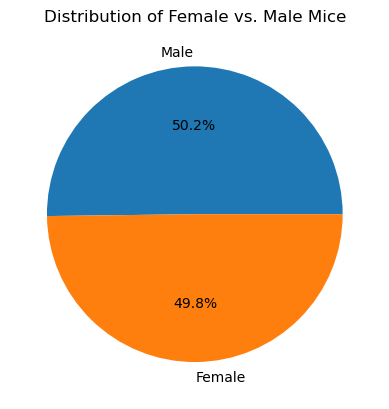

In [23]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice["Sex"].value_counts()

# Generate the pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', title="Distribution of Female vs. Male Mice")
plt.ylabel("")  # Hide the y-label for aesthetics
plt.show()

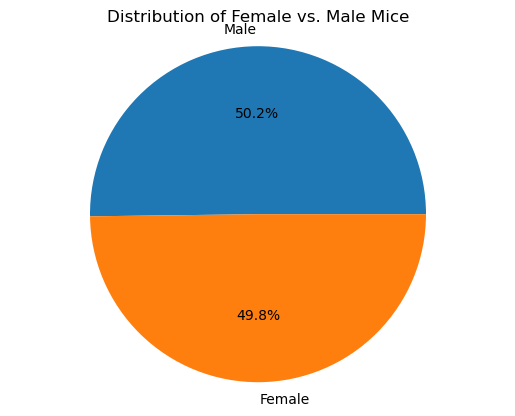

In [25]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice["Sex"].value_counts()

# Generate the pie chart using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")  # Ensures the pie chart is a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Filter data for the specified treatment regimens
filtered_data = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoints.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the DataFrame
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [47]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes at the final timepoint
    treatment_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Append data for later plotting
    tumor_volumes.append(treatment_volumes)
    
    # Calculate the IQR
    quartiles = treatment_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_volumes[(treatment_volumes < lower_bound) | (treatment_volumes > upper_bound)]
    
    # Print results
    print(f"{treatment} treatment:")
    print(f"Lower quartile: {lowerq}, Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Outliers: {outliers.values}\n")

Capomulin treatment:
Lower quartile: 32.37735684, Upper quartile: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999, Upper bound: 51.83201549
Outliers: []

Ramicane treatment:
Lower quartile: 31.56046955, Upper quartile: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003, Upper bound: 54.30681135
Outliers: []

Infubinol treatment:
Lower quartile: 54.04860769, Upper quartile: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999, Upper bound: 82.74144559000001
Outliers: [36.3213458]

Ceftamin treatment:
Lower quartile: 48.72207785, Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002, Upper bound: 87.66645829999999
Outliers: []



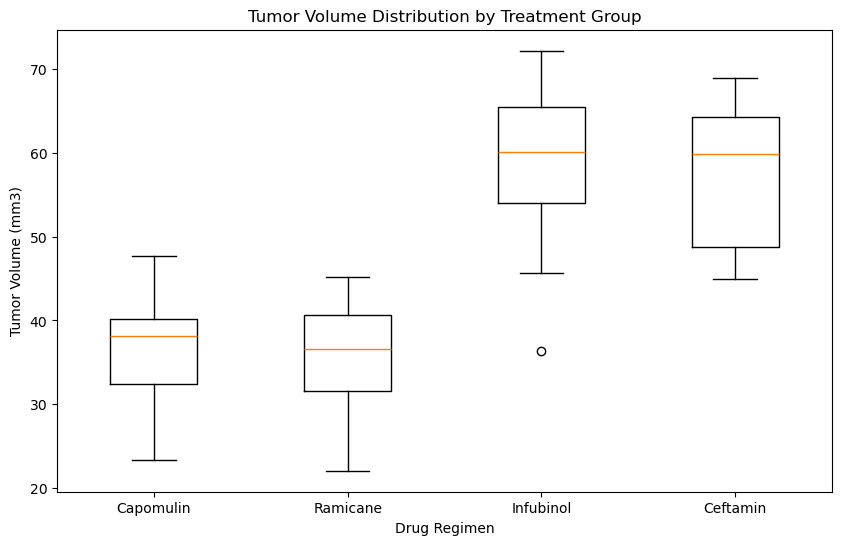

In [37]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments)
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

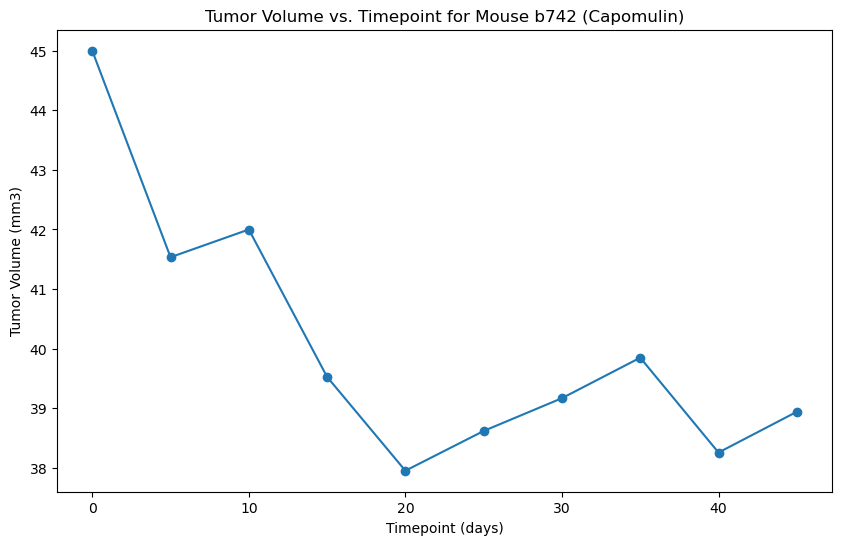

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "b742")]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker='o')
plt.title("Tumor Volume vs. Timepoint for Mouse b742 (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

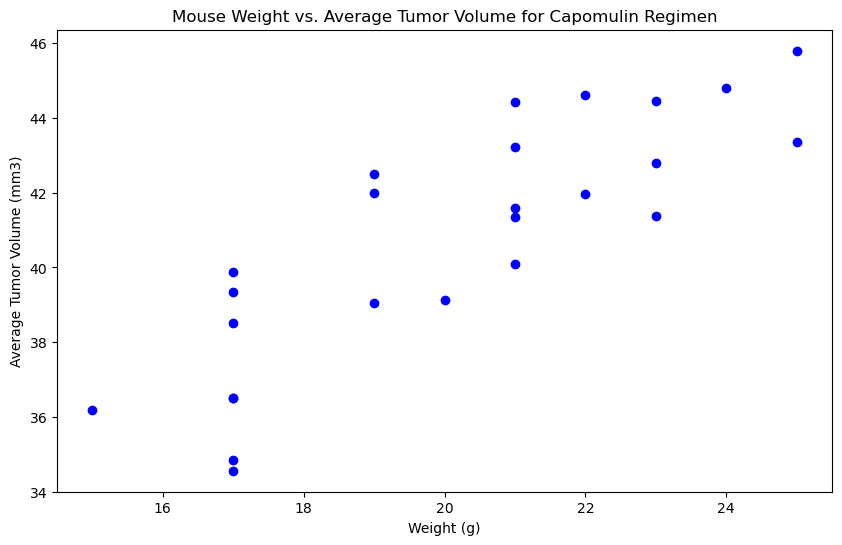

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")).reset_index()

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume["Weight"], capomulin_avg_tumor_volume["Avg_Tumor_Volume"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

Correlation coefficient: 0.84


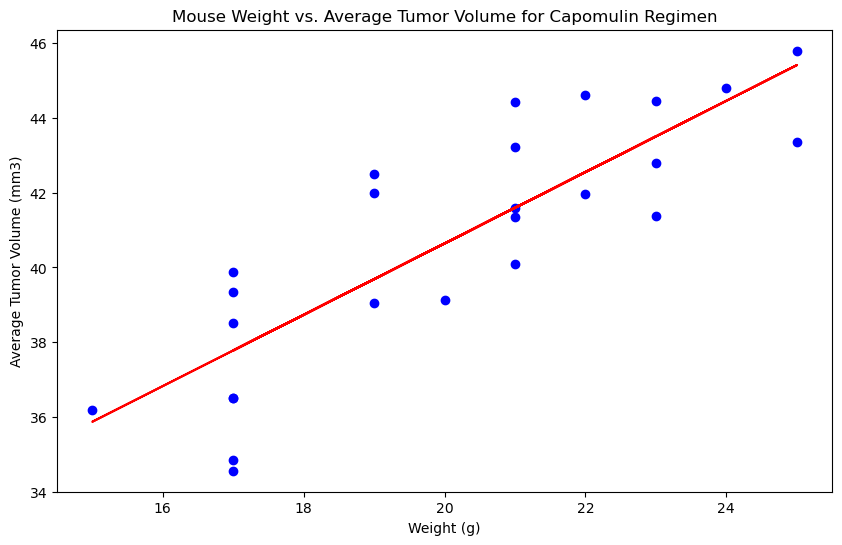

In [49]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")).reset_index()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume["Weight"], capomulin_avg_tumor_volume["Avg_Tumor_Volume"], color="blue", label="Mouse Data")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate correlation coefficient
correlation = capomulin_avg_tumor_volume["Weight"].corr(capomulin_avg_tumor_volume["Avg_Tumor_Volume"])
print(f"Correlation coefficient: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(
    capomulin_avg_tumor_volume["Weight"], capomulin_avg_tumor_volume["Avg_Tumor_Volume"]
)

# Plot the regression line
regression_values = slope * capomulin_avg_tumor_volume["Weight"] + intercept
plt.plot(capomulin_avg_tumor_volume["Weight"], regression_values, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
